In [155]:
from scapy.all import rdpcap, TCP, IP
from decimal import Decimal, getcontext
import numpy as np
import pandas as pd
import os

## Data Cleaning

In [10]:
df = pd.read_pickle('all_traffic_time_10.pkl')
df

,10_EWMA_chunksizes,10_avg_chunksize,10_chunksizes_50,10_chunksizes_50R,10_chunksizes_75,10_chunksizes_75R,10_chunksizes_85,10_chunksizes_85R,10_chunksizes_90,10_chunksizes_90R,...,userTwoRetransmit,userUrgFlags,userXRetransmit,userZeroRetransmit,service,startup3.3,startup6.6,startup5,startup10,startup_mc
0,"[[12816.0], [211635.2], [60158.47619047619], [...",195061.0,105533.0,105533.0,387028.00,387028.00,430820.70,430820.70,445274.0,445274.0,...,0.000000,0,0.079473,0.545527,netflix,False,True,True,True,6.0
1,"[[198244.0], [486736.8], [457148.38095238095],...",349524.2,323073.0,323073.0,551559.50,551559.50,572144.70,572144.70,616673.8,616673.8,...,0.000000,0,0.108333,0.391667,netflix,False,True,True,True,6.0
2,"[[12786.0], [12811.6], [406599.3333333333], [2...",552724.6,596820.0,596820.0,924952.50,924952.50,972990.20,972990.20,998761.4,998761.4,...,0.000000,0,0.156250,0.218750,netflix,False,True,True,True,6.0
3,"[[772020.0], [642372.0], [536471.8095238095], ...",570248.0,586598.0,586598.0,675663.00,675663.00,745960.40,745960.40,796256.4,796256.4,...,0.000000,0,0.212500,0.412500,netflix,False,True,True,True,6.0
4,"[[503378.0], [572290.0], [287298.0], [474179.5...",659017.2,586598.0,586598.0,935179.00,935179.00,1067529.30,1067529.30,1103884.0,1103884.0,...,0.000000,0,0.125000,0.250000,netflix,False,True,True,True,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728987,"[[1457190.0], [793425.2], [1284808.6666666667]...",2089247.6,1658462.0,1658462.0,3174561.50,3174561.50,3226159.50,3226159.50,3271823.6,3271823.6,...,0.013889,0,0.011111,0.086111,amazon,False,True,True,True,6.0
728988,"[[1438366.0], [1120964.4], [1335213.238095238]...",2444589.9,2819048.5,2819048.5,3174561.50,3174561.50,3226159.50,3226159.50,3271823.6,3271823.6,...,0.000000,0,0.006944,0.048611,amazon,False,True,True,True,6.0
728989,"[[1402166.0], [3077212.4], [3206511.904761905]...",2629644.3,2819048.5,2819048.5,3174561.50,3174561.50,3226159.50,3226159.50,3271823.6,3271823.6,...,0.000000,0,0.006944,0.048611,amazon,False,True,True,True,6.0
728990,"[[3246918.0], [2137170.8], [2937503.904761905]...",2379429.9,2665546.0,2665546.0,3071717.25,3071717.25,3169342.90,3169342.90,3193539.0,3193539.0,...,0.000000,0,0.006944,0.034722,amazon,False,True,True,True,6.0


In [4]:
df = pd.read_pickle('data/video_dataset.pkl')

In [330]:
df = pd.read_csv('test1.csv')

In [331]:
df

,File,TotalBytes,AvgBytesPerChunk,MaxBytesPerChunk,MinBytesPerChunk,StdBytesPerChunk,AvgTransferTime,StdTransferTime,AvgTimeBetweenChunks,StdTimeBetweenChunks,RetransmittedChunks,Bitrate,AvgChunksizeforlast10,MaxChunksizeforlast10,MinChunksizeforlast10,StdChunksizeforlast10,50PercChunkSizeforlast10,75PercChunkSizeforlast10,85PercChunkSizeforlast10e,90PercChunkSizeforlast10
0,"['Mar05', '47']",386028055942,1.265666e+09,4.291752e+09,1,969965216,1.925931,6.665428,1.925931,6.665428,91,22.994429,3.098001e+09,3.567484e+09,1.988243e+09,4.094580e+08,3.122400e+09,3.122401e+09,3.411705e+09,3.567484e+09
1,"['Mar01', '80']",279253350840,9.902601e+08,4.209049e+09,1,1017146180,2.093899,7.869078,2.093899,7.869078,98,25.982744,1.107558e+09,2.298144e+09,4.100000e+01,6.354011e+08,1.136494e+09,1.216571e+09,1.589712e+09,1.841385e+09
2,"['Mar06', '112']",572284313981,1.822562e+09,4.205330e+09,1,1156295218,1.879784,6.804809,1.879784,6.804809,102,26.282677,1.301740e+09,3.450737e+09,4.200000e+01,8.964792e+08,1.366666e+09,1.366667e+09,1.366667e+09,1.575074e+09
3,"['Mar15', '164']",505956740857,1.938532e+09,4.206456e+09,1,1073080613,2.299434,5.932419,2.299434,5.932419,55,20.500034,1.248232e+09,3.532425e+09,7.519288e+08,7.895850e+08,1.145637e+09,1.200843e+09,1.232290e+09,1.477544e+09
4,"['Mar06', '145']",360962773738,1.367283e+09,4.255377e+09,1,841631485,2.268310,7.377098,2.268310,7.377098,81,20.718336,1.690514e+09,2.394641e+09,1.096265e+09,4.113140e+08,1.670098e+09,2.012673e+09,2.012673e+09,2.050870e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"['Mar01', '93']",247157316823,9.053382e+08,3.703988e+09,1,1077940519,2.163401,7.989653,2.163401,7.989653,91,24.239900,1.487620e+09,2.909070e+09,1.670566e+08,1.214574e+09,1.048326e+09,2.909070e+09,2.909070e+09,2.909070e+09
344,"['Mar02', '103']",545280808258,1.469760e+09,4.270930e+09,1,1155438183,1.593241,6.337802,1.593241,6.337802,149,31.836834,8.320902e+08,2.191252e+09,4.600000e+01,8.313228e+08,7.890458e+08,1.451681e+09,1.943864e+09,2.100080e+09
345,"['Mar19', '258']",309010249416,1.179428e+09,3.843513e+09,1,1070024374,2.298960,6.546434,2.298960,6.546434,67,21.785120,1.620988e+09,3.149099e+09,1.000000e+00,1.136456e+09,2.150623e+09,2.150623e+09,2.799632e+09,3.149099e+09
346,"['Mar20', '143']",407905895753,1.522037e+09,4.058972e+09,1,903072723,2.203305,6.307195,2.203305,6.307195,57,22.411000,1.151670e+09,2.625416e+09,1.000000e+00,1.023704e+09,4.264593e+08,2.140936e+09,2.455848e+09,2.625415e+09


In [332]:
valid_resolutions = [144, 240, 360, 480, 720, 1080]
# unwanted_data = ["video_id", "home_id"]
# unwanted_data = [
#   "video_id",
#   "video_position",
#   "index",
#   'home_id',
#   "relative_timestamp",
#   "absolute_timestamp",
#   'resolution', 
#   'session_id'
# ]
# df = df.drop(columns=unwanted_data)
df.columns

Index(['File', 'TotalBytes', 'AvgBytesPerChunk', 'MaxBytesPerChunk',
       'MinBytesPerChunk', 'StdBytesPerChunk', 'AvgTransferTime',
       'StdTransferTime', 'AvgTimeBetweenChunks', 'StdTimeBetweenChunks',
       'RetransmittedChunks', 'Bitrate', 'AvgChunksizeforlast10',
       'MaxChunksizeforlast10', 'MinChunksizeforlast10',
       'StdChunksizeforlast10', '50PercChunkSizeforlast10',
       '75PercChunkSizeforlast10', '85PercChunkSizeforlast10e',
       '90PercChunkSizeforlast10'],
      dtype='object')

In [333]:
string_columns = [col for col in df.columns if df[col].dtype == 'object']
string_columns

['File']

In [334]:
# df['service'].head(), df['session_id'].head()
df['session_id'] = list(np.arange(len(df)))

In [335]:
# df_filtered = df.drop(columns=string_columns, errors='ignore')

In [336]:
import ast
df['File'] = df['File'].apply(ast.literal_eval)
df

,File,TotalBytes,AvgBytesPerChunk,MaxBytesPerChunk,MinBytesPerChunk,StdBytesPerChunk,AvgTransferTime,StdTransferTime,AvgTimeBetweenChunks,StdTimeBetweenChunks,...,Bitrate,AvgChunksizeforlast10,MaxChunksizeforlast10,MinChunksizeforlast10,StdChunksizeforlast10,50PercChunkSizeforlast10,75PercChunkSizeforlast10,85PercChunkSizeforlast10e,90PercChunkSizeforlast10,session_id
0,"[Mar05, 47]",386028055942,1.265666e+09,4.291752e+09,1,969965216,1.925931,6.665428,1.925931,6.665428,...,22.994429,3.098001e+09,3.567484e+09,1.988243e+09,4.094580e+08,3.122400e+09,3.122401e+09,3.411705e+09,3.567484e+09,0
1,"[Mar01, 80]",279253350840,9.902601e+08,4.209049e+09,1,1017146180,2.093899,7.869078,2.093899,7.869078,...,25.982744,1.107558e+09,2.298144e+09,4.100000e+01,6.354011e+08,1.136494e+09,1.216571e+09,1.589712e+09,1.841385e+09,1
2,"[Mar06, 112]",572284313981,1.822562e+09,4.205330e+09,1,1156295218,1.879784,6.804809,1.879784,6.804809,...,26.282677,1.301740e+09,3.450737e+09,4.200000e+01,8.964792e+08,1.366666e+09,1.366667e+09,1.366667e+09,1.575074e+09,2
3,"[Mar15, 164]",505956740857,1.938532e+09,4.206456e+09,1,1073080613,2.299434,5.932419,2.299434,5.932419,...,20.500034,1.248232e+09,3.532425e+09,7.519288e+08,7.895850e+08,1.145637e+09,1.200843e+09,1.232290e+09,1.477544e+09,3
4,"[Mar06, 145]",360962773738,1.367283e+09,4.255377e+09,1,841631485,2.268310,7.377098,2.268310,7.377098,...,20.718336,1.690514e+09,2.394641e+09,1.096265e+09,4.113140e+08,1.670098e+09,2.012673e+09,2.012673e+09,2.050870e+09,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"[Mar01, 93]",247157316823,9.053382e+08,3.703988e+09,1,1077940519,2.163401,7.989653,2.163401,7.989653,...,24.239900,1.487620e+09,2.909070e+09,1.670566e+08,1.214574e+09,1.048326e+09,2.909070e+09,2.909070e+09,2.909070e+09,343
344,"[Mar02, 103]",545280808258,1.469760e+09,4.270930e+09,1,1155438183,1.593241,6.337802,1.593241,6.337802,...,31.836834,8.320902e+08,2.191252e+09,4.600000e+01,8.313228e+08,7.890458e+08,1.451681e+09,1.943864e+09,2.100080e+09,344
345,"[Mar19, 258]",309010249416,1.179428e+09,3.843513e+09,1,1070024374,2.298960,6.546434,2.298960,6.546434,...,21.785120,1.620988e+09,3.149099e+09,1.000000e+00,1.136456e+09,2.150623e+09,2.150623e+09,2.799632e+09,3.149099e+09,345
346,"[Mar20, 143]",407905895753,1.522037e+09,4.058972e+09,1,903072723,2.203305,6.307195,2.203305,6.307195,...,22.411000,1.151670e+09,2.625416e+09,1.000000e+00,1.023704e+09,4.264593e+08,2.140936e+09,2.455848e+09,2.625415e+09,346


# Add resolution

In [337]:
df_res = pd.read_csv('ExperimentInfo.txt', delimiter=' ', names=['exp', 'id', 'res', 'length'], header=None)
df_res['res'] = df_res['res'].apply(lambda x: (x[2:] if ('hd' in x) else x))
df_res['res'] = df_res['res'].apply(lambda x: '480' if x=='large' else ('360' if x=='medium' else ('240' if x=='small' else('144' if x=='tiny' else x))))

In [338]:
res_dict = {}
for i, j in zip(df_res['exp'], df_res['res']): 
    res_dict[i] = j

In [339]:
res_dict

{28: '720',
 29: '720',
 30: '720',
 31: '720',
 32: '720',
 33: '720',
 34: '720',
 35: '720',
 36: '720',
 37: '720',
 38: '720',
 39: '720',
 40: '720',
 41: '720',
 42: '720',
 43: '720',
 44: '720',
 45: '720',
 46: '720',
 47: '720',
 48: '720',
 49: '720',
 50: '720',
 51: '720',
 52: '720',
 53: '720',
 54: '720',
 55: '720',
 56: '720',
 57: '720',
 58: '720',
 59: '720',
 60: '720',
 61: '720',
 62: '720',
 63: '720',
 64: '720',
 65: '720',
 66: '720',
 67: '720',
 68: '1080',
 69: '1080',
 70: '1080',
 71: '1080',
 72: '1080',
 73: '1080',
 74: '1080',
 75: '1080',
 76: '1080',
 77: '1080',
 78: '1080',
 79: '1080',
 80: '1080',
 81: '1080',
 82: '1080',
 83: '1080',
 84: '1080',
 85: '1080',
 86: '1080',
 87: '1080',
 88: '1080',
 89: '1080',
 90: '1080',
 91: '1080',
 92: '1080',
 93: '1080',
 94: '1080',
 95: '1080',
 96: '1080',
 97: '1080',
 98: '1080',
 99: '1080',
 100: '1080',
 101: '1080',
 102: '1080',
 103: '1080',
 104: '1080',
 105: '1080',
 106: '1080',
 107: 

In [340]:
df['resolution'] = [int(res_dict[int(x[1])]) for x in df['File']]

In [341]:
df

,File,TotalBytes,AvgBytesPerChunk,MaxBytesPerChunk,MinBytesPerChunk,StdBytesPerChunk,AvgTransferTime,StdTransferTime,AvgTimeBetweenChunks,StdTimeBetweenChunks,...,AvgChunksizeforlast10,MaxChunksizeforlast10,MinChunksizeforlast10,StdChunksizeforlast10,50PercChunkSizeforlast10,75PercChunkSizeforlast10,85PercChunkSizeforlast10e,90PercChunkSizeforlast10,session_id,resolution
0,"[Mar05, 47]",386028055942,1.265666e+09,4.291752e+09,1,969965216,1.925931,6.665428,1.925931,6.665428,...,3.098001e+09,3.567484e+09,1.988243e+09,4.094580e+08,3.122400e+09,3.122401e+09,3.411705e+09,3.567484e+09,0,720
1,"[Mar01, 80]",279253350840,9.902601e+08,4.209049e+09,1,1017146180,2.093899,7.869078,2.093899,7.869078,...,1.107558e+09,2.298144e+09,4.100000e+01,6.354011e+08,1.136494e+09,1.216571e+09,1.589712e+09,1.841385e+09,1,1080
2,"[Mar06, 112]",572284313981,1.822562e+09,4.205330e+09,1,1156295218,1.879784,6.804809,1.879784,6.804809,...,1.301740e+09,3.450737e+09,4.200000e+01,8.964792e+08,1.366666e+09,1.366667e+09,1.366667e+09,1.575074e+09,2,480
3,"[Mar15, 164]",505956740857,1.938532e+09,4.206456e+09,1,1073080613,2.299434,5.932419,2.299434,5.932419,...,1.248232e+09,3.532425e+09,7.519288e+08,7.895850e+08,1.145637e+09,1.200843e+09,1.232290e+09,1.477544e+09,3,360
4,"[Mar06, 145]",360962773738,1.367283e+09,4.255377e+09,1,841631485,2.268310,7.377098,2.268310,7.377098,...,1.690514e+09,2.394641e+09,1.096265e+09,4.113140e+08,1.670098e+09,2.012673e+09,2.012673e+09,2.050870e+09,4,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,"[Mar01, 93]",247157316823,9.053382e+08,3.703988e+09,1,1077940519,2.163401,7.989653,2.163401,7.989653,...,1.487620e+09,2.909070e+09,1.670566e+08,1.214574e+09,1.048326e+09,2.909070e+09,2.909070e+09,2.909070e+09,343,1080
344,"[Mar02, 103]",545280808258,1.469760e+09,4.270930e+09,1,1155438183,1.593241,6.337802,1.593241,6.337802,...,8.320902e+08,2.191252e+09,4.600000e+01,8.313228e+08,7.890458e+08,1.451681e+09,1.943864e+09,2.100080e+09,344,1080
345,"[Mar19, 258]",309010249416,1.179428e+09,3.843513e+09,1,1070024374,2.298960,6.546434,2.298960,6.546434,...,1.620988e+09,3.149099e+09,1.000000e+00,1.136456e+09,2.150623e+09,2.150623e+09,2.799632e+09,3.149099e+09,345,144
346,"[Mar20, 143]",407905895753,1.522037e+09,4.058972e+09,1,903072723,2.203305,6.307195,2.203305,6.307195,...,1.151670e+09,2.625416e+09,1.000000e+00,1.023704e+09,4.264593e+08,2.140936e+09,2.455848e+09,2.625415e+09,346,480


## Quality Inference via RF

In [342]:
import numpy as np

train_sessions = np.random.choice(df['session_id'].unique(), int(df['session_id'].unique().shape[0]*.8), replace=False)
test_sessions = df[~df['session_id'].isin(train_sessions)]['session_id'].unique()

df_train = df[df['session_id'].isin(train_sessions)]
df_test = df[df['session_id'].isin(test_sessions)]

In [343]:
!pip install matplotlib

In [354]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn import linear_model, ensemble, tree, model_selection, metrics
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier

x_train = df_train.drop(['resolution', 'session_id', 'File'], axis=1).values
x_test = df_test.drop(['resolution', 'session_id', 'File'], axis=1).values

classes = [144, 240,360,480,720,1080]

y_train_not_binarized = df_train['resolution'].values
y_train_binarized = label_binarize(y_train_not_binarized, classes=classes)
y_test_not_binarized = df_test['resolution']
y_test_binarized = label_binarize(y_test_not_binarized, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

In [357]:
y_train_binarized

array([[0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]])

In [358]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(RandomForestClassifier())

gen_clf = classifier.fit(x_train, y_train_binarized)

y_score = gen_clf.predict_proba(x_test)

n_classes = y_test_binarized.shape[1]

In [359]:
y_score

array([[0.06, 0.24, 0.03, 0.48, 0.22, 0.33],
       [0.04, 0.  , 0.01, 0.17, 0.13, 0.75],
       [0.01, 0.17, 0.  , 0.13, 0.33, 0.53],
       [0.  , 0.08, 0.  , 0.1 , 0.19, 0.75],
       [0.01, 0.02, 0.07, 0.07, 0.99, 0.07],
       [0.02, 0.03, 0.11, 0.25, 0.29, 0.02],
       [0.07, 0.  , 0.04, 0.35, 0.18, 0.22],
       [0.37, 0.  , 0.39, 0.14, 0.18, 0.03],
       [0.03, 0.27, 0.01, 0.18, 0.34, 0.4 ],
       [0.06, 0.35, 0.03, 0.14, 0.23, 0.01],
       [0.29, 0.02, 0.21, 0.15, 0.14, 0.06],
       [0.15, 0.  , 0.07, 0.11, 1.  , 0.01],
       [0.04, 0.01, 0.03, 0.33, 0.28, 0.07],
       [0.05, 0.07, 0.01, 0.2 , 0.17, 0.21],
       [0.07, 0.14, 0.18, 0.2 , 0.41, 0.47],
       [0.01, 0.  , 0.55, 0.11, 0.21, 0.  ],
       [0.22, 0.  , 0.31, 0.2 , 0.13, 0.05],
       [0.03, 0.23, 0.07, 0.07, 0.51, 0.03],
       [0.11, 0.18, 0.14, 0.32, 0.38, 0.21],
       [0.17, 0.1 , 0.08, 0.26, 0.18, 0.18],
       [0.08, 0.  , 0.03, 0.21, 0.31, 0.53],
       [0.09, 0.27, 0.  , 0.07, 0.46, 0.12],
       [0.

In [360]:
import numpy as np
from sklearn.metrics import roc_curve, auc  # Make sure auc is imported correctly

# Assuming y_test_binarized and y_score are defined correctly and have the right shapes
n_classes = y_test_binarized.shape[1]

# Calculate ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])  # auc here should work as expected if imported correctly

# Compute the Micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Ensure auc is the function from sklearn.metrics and not overridden or blocked by another variable/type
print("Micro-average ROC curve area:", roc_auc["micro"])

Micro-average ROC curve area: 0.8365102040816326


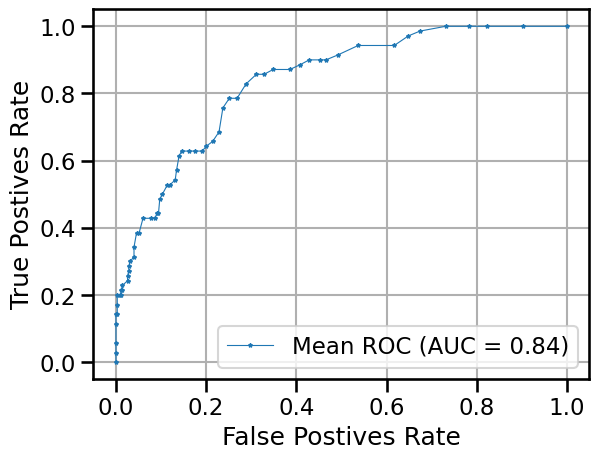

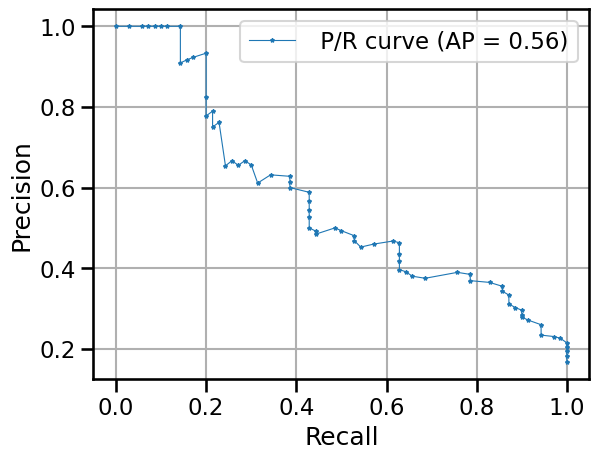

In [361]:
# A "micro-average": quantifying score on all classes jointly
precision = dict()
recall = dict()
average_precision = dict()

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_binarized.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_binarized, y_score, average="micro")

plt.plot(fpr["micro"], tpr["micro"], label='Mean ROC (AUC = %0.2f)' % (roc_auc["micro"]), 
         linestyle='-', linewidth=0.8, marker='*', markersize=3)
plt.xlabel('False Postives Rate')
plt.ylabel('True Postives Rate')
plt.grid(True, which='major', axis='both')
plt.legend()
plt.show()

plt.plot(recall["micro"], precision["micro"], label=' P/R curve (AP = %0.2f)' % (average_precision["micro"]), 
         linestyle='-', linewidth=0.8, marker='*', markersize=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True, which='major', axis='both')
plt.show()

## Feature Importance_

In [350]:
# Collect in an ordered array the features and their importance in the prediction
feature_importance = []
features = df_train.drop(['resolution', 'session_id', 'File'], axis=1).columns.tolist()

# Here is an example of how to get the feature importance for 
for i, feature in enumerate(features):
  feature_importance.append({'name': feature, 'GINI_index': gen_clf.estimators_[1].feature_importances_[i]})

feature_importance = sorted(feature_importance, key=lambda k: k['GINI_index'], reverse=True)

In [351]:
!pip install seaborn

In [352]:
feature_importance

[{'name': 'StdTimeBetweenChunks', 'GINI_index': 0.08625945265279072},
 {'name': 'StdTransferTime', 'GINI_index': 0.07354375022946814},
 {'name': 'StdBytesPerChunk', 'GINI_index': 0.07176639056845263},
 {'name': 'MaxBytesPerChunk', 'GINI_index': 0.06918740920429255},
 {'name': 'StdChunksizeforlast10', 'GINI_index': 0.06705009610831379},
 {'name': 'RetransmittedChunks', 'GINI_index': 0.06506262149639133},
 {'name': '85PercChunkSizeforlast10e', 'GINI_index': 0.05597821724908037},
 {'name': 'MinChunksizeforlast10', 'GINI_index': 0.05554524139595167},
 {'name': 'AvgChunksizeforlast10', 'GINI_index': 0.05461237416497888},
 {'name': '90PercChunkSizeforlast10', 'GINI_index': 0.05444701162945546},
 {'name': 'MaxChunksizeforlast10', 'GINI_index': 0.052898654967283},
 {'name': '75PercChunkSizeforlast10', 'GINI_index': 0.05038935734419221},
 {'name': 'Bitrate', 'GINI_index': 0.0503814729386957},
 {'name': '50PercChunkSizeforlast10', 'GINI_index': 0.045200248706978974},
 {'name': 'AvgTransferTime',

                    name  GINI_index
0   StdTimeBetweenChunks    0.086259
1        StdTransferTime    0.073544
2       StdBytesPerChunk    0.071766
3       MaxBytesPerChunk    0.069187
4  StdChunksizeforlast10    0.067050


/tmp/ipykernel_28/1813954981.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GINI_index', y='name', data=df_feature_importance, palette="viridis")


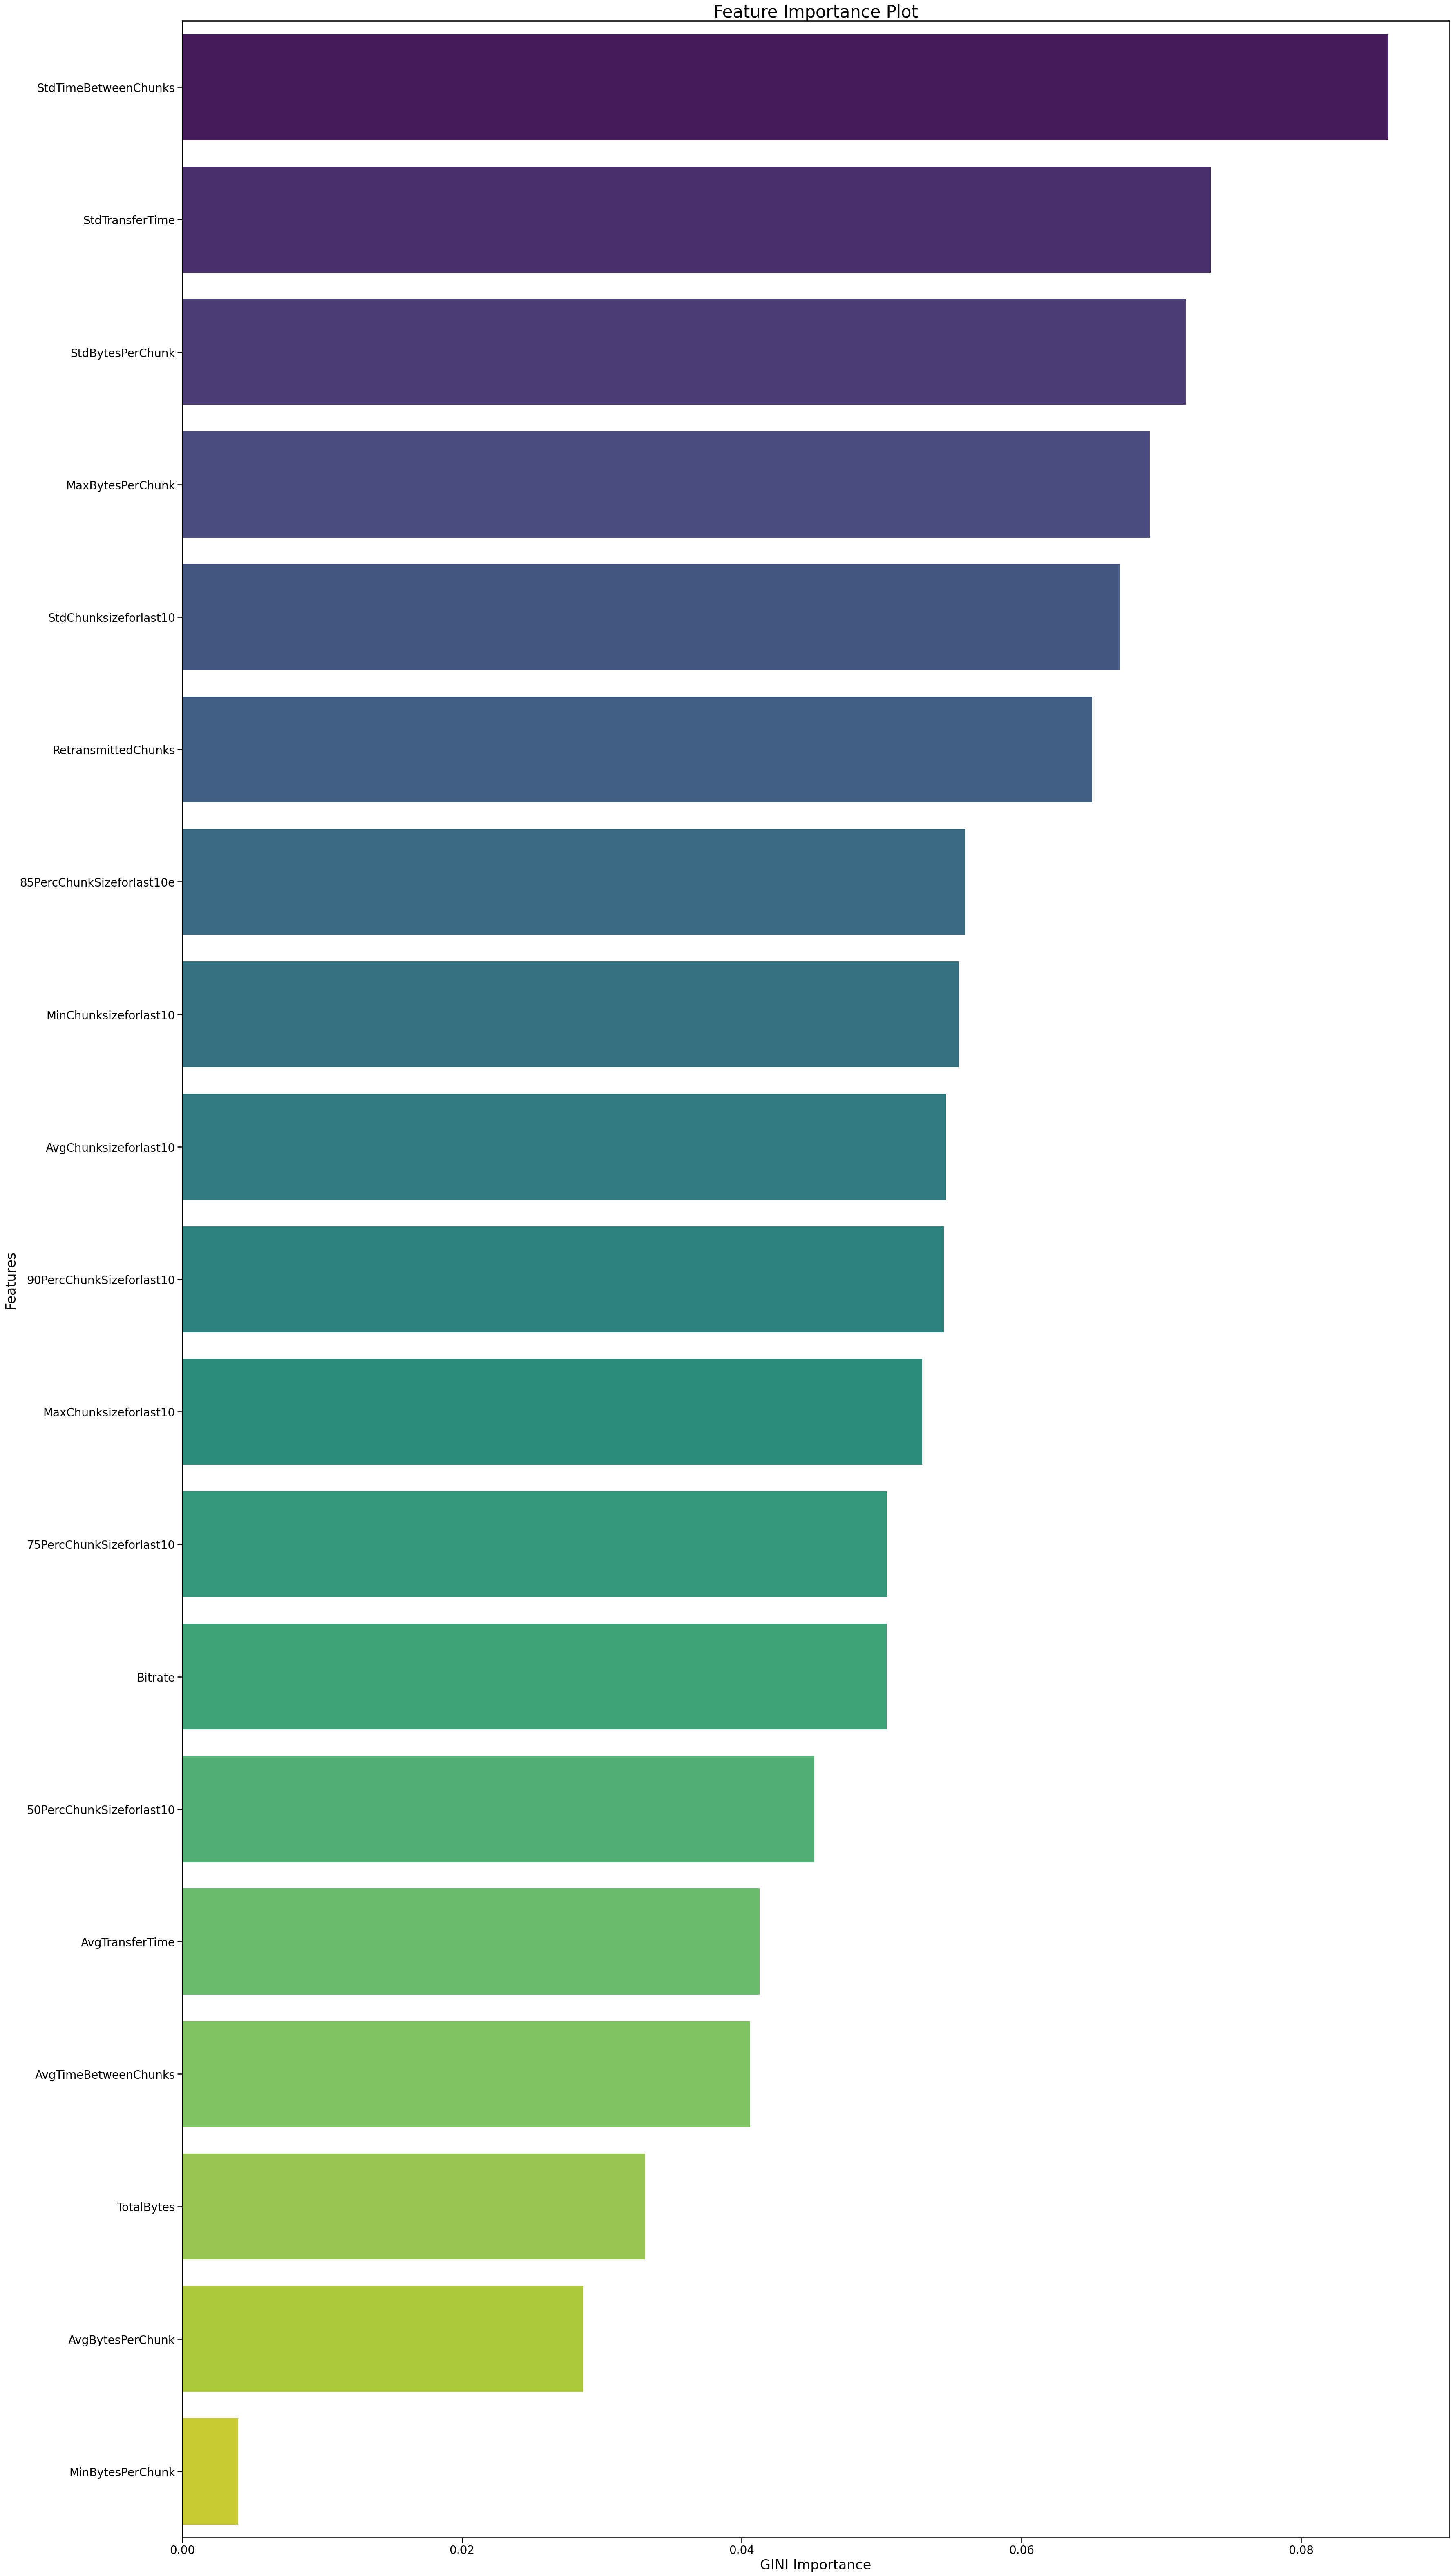

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sorted feature importance data to a DataFrame
df_feature_importance = pd.DataFrame(feature_importance)
print(df_feature_importance.head())

# Set the plot size
plt.figure(figsize=(40, 80))  # Increase the figure size (width, height) as needed

# Set larger font sizes
sns.set_context("talk")  # 'talk' is larger than the default. Other options include 'paper', 'notebook', 'talk', 'poster'

# Creating a bar plot
sns.barplot(x='GINI_index', y='name', data=df_feature_importance, palette="viridis")

# Adding plot labels and title with increased font sizes
plt.xlabel('GINI Importance', fontsize=24)  # Increase font size for x-label
plt.ylabel('Features', fontsize=24)  # Increase font size for y-label
plt.title('Feature Importance Plot', fontsize=30)  # Increase font size for title

# Optionally, you can adjust tick parameters for both axes
plt.xticks(fontsize=20)  # Increase font size for x-ticks
plt.yticks(fontsize=20)  # Increase font size for y-ticks

# Display the plot
plt.show()


## Select features by layer (TODO)

In [ ]:
l3_features = [col for col in df.columns if 'L3' in col]

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

# Load data
x_train = df_train.drop(['resolution', 'session_id', 'service'], axis=1).values
x_test = df_test.drop(['resolution', 'session_id', 'service'], axis=1).values

y_train_not_binarized = df_train['resolution'].values
y_train_binarized = label_binarize(y_train_not_binarized, classes=classes)
y_test_not_binarized = df_test['resolution'].values
y_test_binarized = label_binarize(y_test_not_binarized, classes=classes)

l3_features = [col for col in X.columns if 'L3' in col]
l4_features = [col for col in X.columns if 'L4' in col]
# more...


## Replicate the study of inferecing Quality inference
# train_and_evaluate(l3_features, y_train_binarized)
# train_and_evaluate(l4_features, y_train_binarized)

## Predict resolution of a Youtube / Netflix / Twitch session 

In [56]:
# df_session

In [328]:
df_session = pd.read_pickle("data/netflix_session.pkl")

# unwanted_data = [
#   "video_id",
#   "video_position",
#   "index",
#   'home_id',
#   "relative_timestamp",
#   "absolute_timestamp",
#   'resolution', 
#   'session_id'
# ]
unwanted_data = ["video_id", "home_id", 'resolution', 'session_id']

# Predict the inferred resolutions and compare
#TODO
x = df_session.drop(columns=unwanted_data).values
y = [0 if v is None else int(v) for v in df_session['resolution'].values]
classes = [240, 360, 480, 720, 1080] 
y_binarized = label_binarize(y, classes=classes)

predicted_binarized = gen_clf.predict(x)  # direct class prediction
predicted_resolutions = [classes[np.argmax(row)] if np.max(row) > 0 else 0 for row in predicted_binarized]

# You can use this code to plot the result (predicted_resolutions is a list)
plt.figure(figsize=(15, 7))  # Set figure size for better readability
plt.plot(df_session['relative_timestamp'].values, y, label='Real', marker='o', linestyle='-')
plt.plot(df_session['relative_timestamp'].values, predicted_resolutions, label='Predicted', marker='x', linestyle='--')
plt.xlabel('Session Time')
plt.ylabel('Resolution')
plt.title('Real vs Predicted Resolutions Over Time')
plt.legend()
plt.show()

ValueError: X has 165 features, but RandomForestClassifier is expecting 19 features as input.